 **Mochammad Randy Surya Bachri**



*   Dataset [Data Science Salaries Dataset](https://www.kaggle.com/datasets/yusufdelikkaya/datascience-salaries-2024)
*   This dataset is a collection of data from Kaggle, which contains information about used cars in the Indian market, featuring 9,582 records with 11 detailed attributes. Collected up to November 2024, it offers an in-depth overview of India's second-hand car market.
* Streamlit Link : [Streamlit]()



# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Wrangling

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1C9O5pNPeg1PK_qlLxa2Ow2FYCUelv0mr')

In [3]:
df

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


# 3. Data Availibility

In [5]:
df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

In [6]:
# Cleaning and converting the kmDriven column
df['kmDriven'] = df['kmDriven'].str.replace(' km', '').str.replace(',', '').astype('float')

# Cleaning and converting the AskPrice column
df['AskPrice'] = df['AskPrice'].str.replace('₹ ', '').str.replace(',', '').astype('int64')

# Converting PostedDate to datetime format
df['PostedDate'] = pd.to_datetime(df['PostedDate'], format='%b-%y', errors='coerce')

# Handling missing values in kmDriven (filling with median)
median_km = df['kmDriven'].median()
df['kmDriven'].fillna(median_km, inplace=True)

# Re-checking for null values
null_values_after_cleaning = df.isnull().sum()

# Display cleaned df info and null value status
df.info(), null_values_after_cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Brand         9582 non-null   object        
 1   model         9582 non-null   object        
 2   Year          9582 non-null   int64         
 3   Age           9582 non-null   int64         
 4   kmDriven      9582 non-null   float64       
 5   Transmission  9582 non-null   object        
 6   Owner         9582 non-null   object        
 7   FuelType      9582 non-null   object        
 8   PostedDate    9582 non-null   datetime64[ns]
 9   AdditionInfo  9582 non-null   object        
 10  AskPrice      9582 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 823.6+ KB


C:\Users\ACER\AppData\Local\Temp\ipykernel_22936\341179788.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kmDriven'].fillna(median_km, inplace=True)


(None,
 Brand           0
 model           0
 Year            0
 Age             0
 kmDriven        0
 Transmission    0
 Owner           0
 FuelType        0
 PostedDate      0
 AdditionInfo    0
 AskPrice        0
 dtype: int64)

In [7]:
df.duplicated().sum()

731

In [8]:
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows.head())
print(f"Shape of duplicated rows: {duplicated_rows.shape}")

            Brand                model  Year  Age  kmDriven Transmission  \
7             BMW             5 Series  2019    5   25000.0    Automatic   
8   Maruti Suzuki  maruti-suzuki-dzire  2020    4   33759.0       Manual   
14  Mercedes-Benz            GLE COUPE  2021    3   32000.0    Automatic   
19            BMW          3 Series GT  2015    9   61000.0    Automatic   
20           Ford            Endeavour  2019    5   77000.0    Automatic   

     Owner FuelType PostedDate  \
7   second   Diesel 2024-11-01   
8   second   Petrol 2024-11-01   
14  second   Petrol 2024-10-01   
19  second   Diesel 2024-11-01   
20  second   Diesel 2024-11-01   

                                         AdditionInfo  AskPrice  
7         BMW 5 Series 3.0 530D M Sport, 2019, Diesel   5950000  
8           Maruti Suzuki Dzire 1.2 VXI, 2020, Petrol    622000  
14  Mercedes-Benz GLE COUPE 3.0 53 AMG 4MATIC Plus...  11800000  
19     BMW 3 Series GT 320d Luxury Line, 2015, Diesel   1500000  
20   For

In [9]:
duplicate_counts = df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size()
print(duplicate_counts)

Brand       model      Year  Age  kmDriven  Transmission  Owner   FuelType  PostedDate  AdditionInfo                                                  AskPrice
Audi        A3         2015  9    42000.0   Automatic     second  Diesel    2024-11-01  Audi A3 2.0 35 TDI Attraction, 2015, Diesel                   1050000     23
                                  64000.0   Automatic     second  Diesel    2024-11-01  Audi A3 2.0 35 TDI Premium, 2015, Diesel                      850000       2
                       2016  8    99000.0   Automatic     second  Diesel    2024-11-01  Audi A3 35 TDI S Line, 2016, Diesel                           949000       6
            A4         2013  11   102000.0  Automatic     second  Diesel    2024-11-01  Audi A4 2.0 TDI, 2013, Diesel                                 1020000      2
                       2015  9    135000.0  Automatic     second  Diesel    2024-11-01  Audi A4 2014-2016 2.0 TDI Multitronic, 2015, Diesel           1650000      2
                

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,2024-11-01,"Honda City v teck in mint condition, valid gen...",195000
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,2024-07-01,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",375000
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,2024-11-01,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",184999
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,2024-11-01,Maruti Suzuki Swift 2017 Diesel Good Condition,565000
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,2024-11-01,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",685000
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,105904.0,Automatic,second,Diesel,2024-10-01,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel",1040000
9578,Maruti Suzuki,Alto-800,2020,4,55000.0,Manual,first,Hybrid/CNG,2024-11-01,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...",375000
9579,Maruti Suzuki,Ritz,2013,11,92000.0,Manual,first,Diesel,2024-11-01,"Maruti Suzuki Ritz VDi, 2013, Diesel",415000
9580,Hyundai,Verna,2019,5,72000.0,Automatic,first,Petrol,2024-10-01,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol",855000


# Statistik Deskriptif

In [13]:
print("Statistik deskriptif:")
print(df.describe(include='all'))

Statistik deskriptif:


                Brand model         Year          Age       kmDriven  \
count            8851  8851  8851.000000  8851.000000    8851.000000   
unique             39   400          NaN          NaN            NaN   
top     Maruti Suzuki  City          NaN          NaN            NaN   
freq             2589   306          NaN          NaN            NaN   
mean              NaN   NaN  2016.377697     7.622303   70979.277370   
min               NaN   NaN  1986.000000     0.000000       0.000000   
25%               NaN   NaN  2014.000000     5.000000   43327.000000   
50%               NaN   NaN  2017.000000     7.000000   65000.000000   
75%               NaN   NaN  2019.000000    10.000000   86000.000000   
max               NaN   NaN  2024.000000    38.000000  980002.000000   
std               NaN   NaN     4.133730     4.133730   56864.792468   

       Transmission  Owner FuelType                     PostedDate  \
count          8851   8851     8851                           885

# 4. Exploratory Data Analysis

In [14]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Kolom '{col}': {len(values)} unique values")
    print(values)

    print("-" * 50)

Kolom 'Brand': 39 unique values
['Honda' 'Toyota' 'Volkswagen' 'Maruti Suzuki' 'BMW' 'Ford' 'Kia'
 'Mercedes-Benz' 'Hyundai' 'Audi' 'Renault' 'MG' 'Volvo' 'Skoda' 'Tata'
 'Mahindra' 'Mini' 'Land Rover' 'Jeep' 'Chevrolet' 'Jaguar' 'Fiat'
 'Aston Martin' 'Porsche' 'Nissan' 'Force' 'Mitsubishi' 'Lexus' 'Isuzu'
 'Datsun' 'Ambassador' 'Rolls-Royce' 'ICML' 'Bajaj' 'Opel' 'Ashok'
 'Bentley' 'Ssangyong' 'Maserati']
--------------------------------------------------
Kolom 'model': 400 unique values
['City' 'Innova' 'VentoTest' 'Swift' 'Baleno' 'X3' '5 Series'
 'maruti-suzuki-dzire' 'Ecosport' 'Alto-K10' 'Carnival' 'Swift-Dzire'
 'Corolla' 'GLE COUPE' 'Xcent' 'Seltos' 'Ertiga' '3 Series GT' 'Endeavour'
 'Innova Crysta' 'A3' 'KWID' 'Hector' 'Celerio' 'Vitara-Brezza'
 '2.8 Legender 4X2' 'S90' 'Venue' 'Creta' 'Alcazar' 'i20' 'E-Class' 'Polo'
 'Verna' 'A4' 'Fortuner' 'C-Class' 'Kushaq' 'Ciaz' 'Safari' 'BRV' 'Duster'
 'Wagon-R' 'Bolero Power Plus' 'Eon' 'Hector Plus' 'XUV500' 'GLS' 'i10'
 'GLA Class'

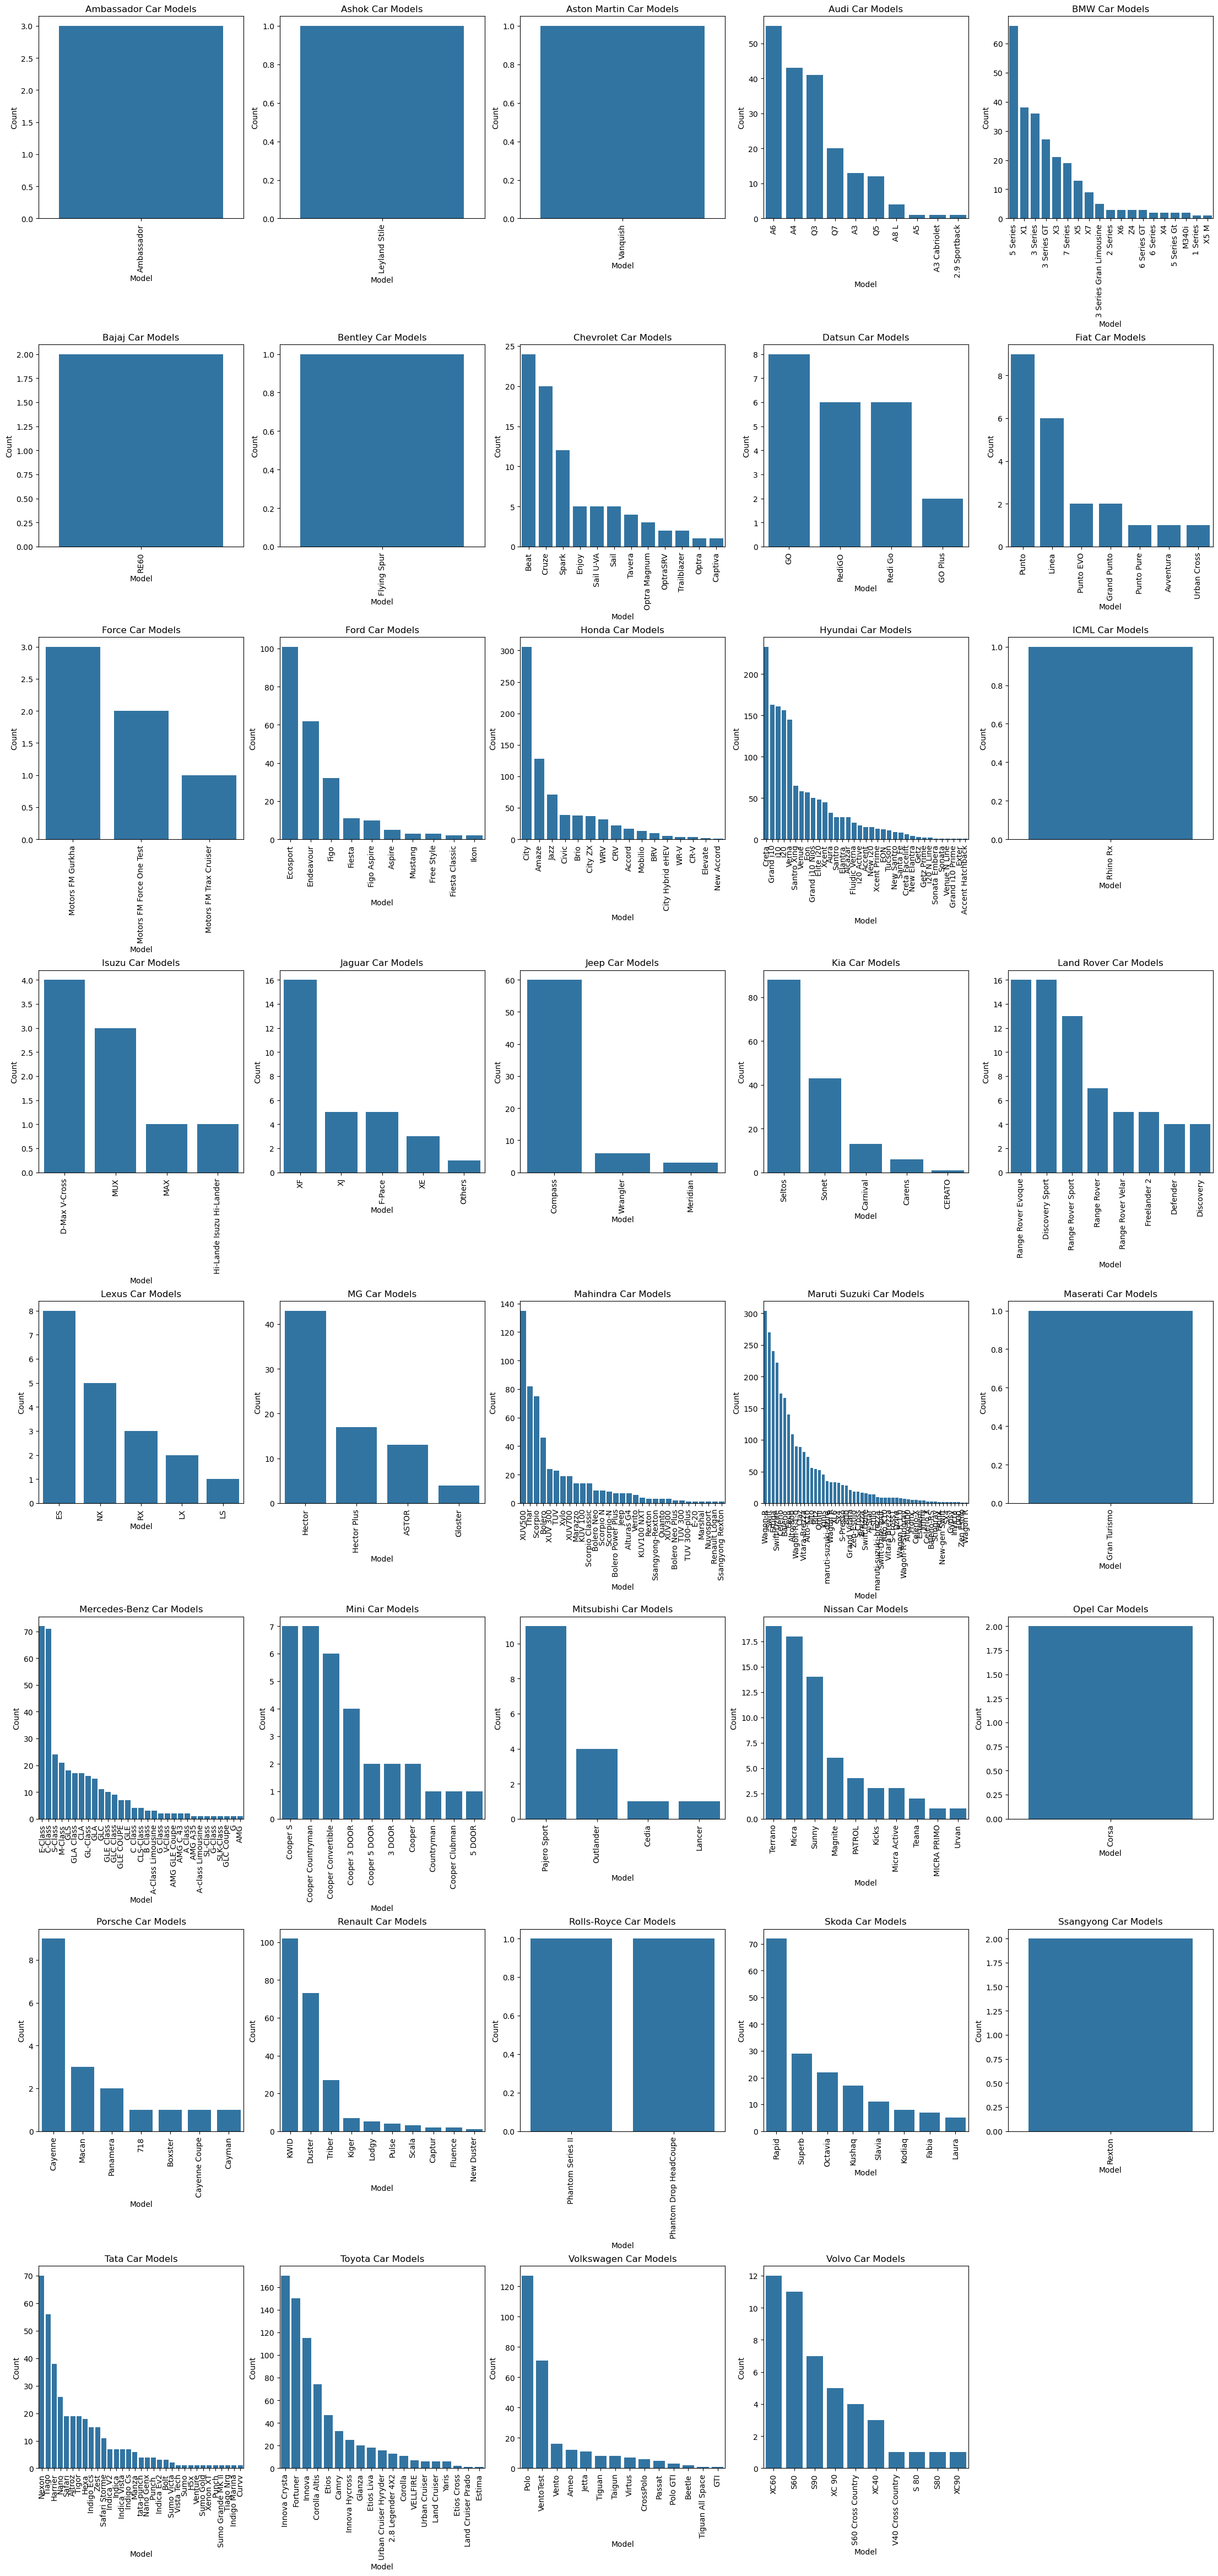

In [23]:
#visualisasi jumlah penjualan mobil per model untuk setiap merek (Brand) dalam dataset.
brands = sorted(df['Brand'].unique())
n_rows = -(-len(brands) // 3)  # Hitung jumlah baris, dibulatkan ke atas
fig, axes = plt.subplots(n_rows, 3, figsize=(22, n_rows * 5), constrained_layout=True)

axes = axes.flatten()  # Flatten untuk mempermudah iterasi

for i, brand in enumerate(brands):
    brand_cars = df[df['Brand'] == brand]
    model_order = brand_cars['model'].value_counts().index  # Urutkan model berdasarkan frekuensi

    sns.countplot(x='model', data=brand_cars, order=model_order, ax=axes[i])
    axes[i].set_title(f'{brand} Car Models')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Hilangkan subplot kosong jika jumlah brand tidak kelipatan 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

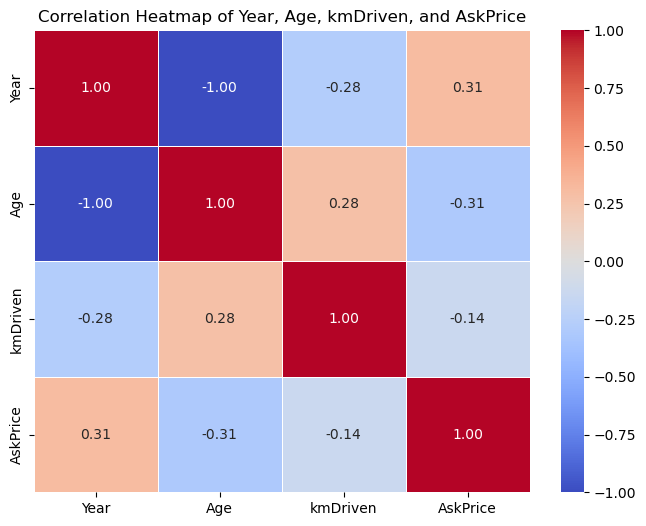

In [26]:
# Correlation heatmap for Year, Age, kmDriven, and AskPrice
correlation_matrix = df[['Year', 'Age', 'kmDriven', 'AskPrice']].corr()

# Create a heatmap to show the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Year, Age, kmDriven, and AskPrice")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_22936\1978730632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='AskPrice', data=df, palette="inferno")


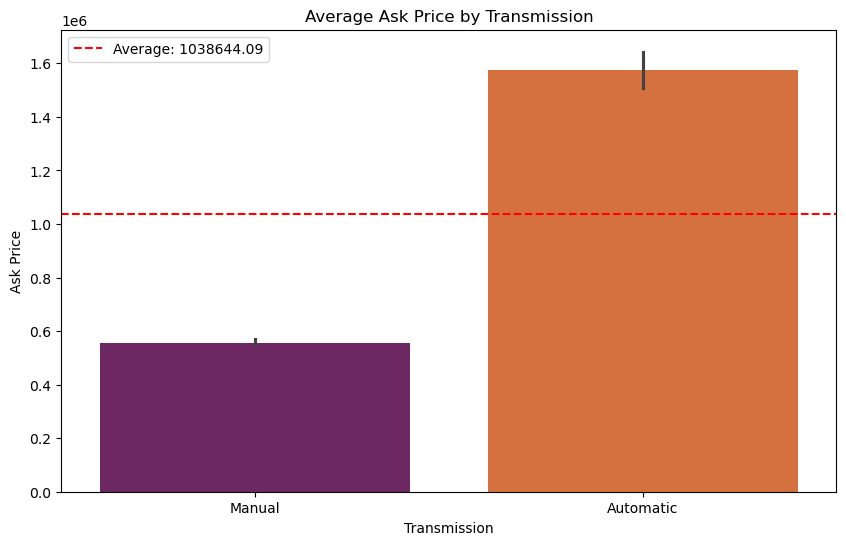

In [27]:
# visualisasi transmisi average price
plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission', y='AskPrice', data=df, palette="inferno")

average_price = df['AskPrice'].mean()

plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:.2f}')

plt.title("Average Ask Price by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Ask Price")
plt.legend()
plt.show()

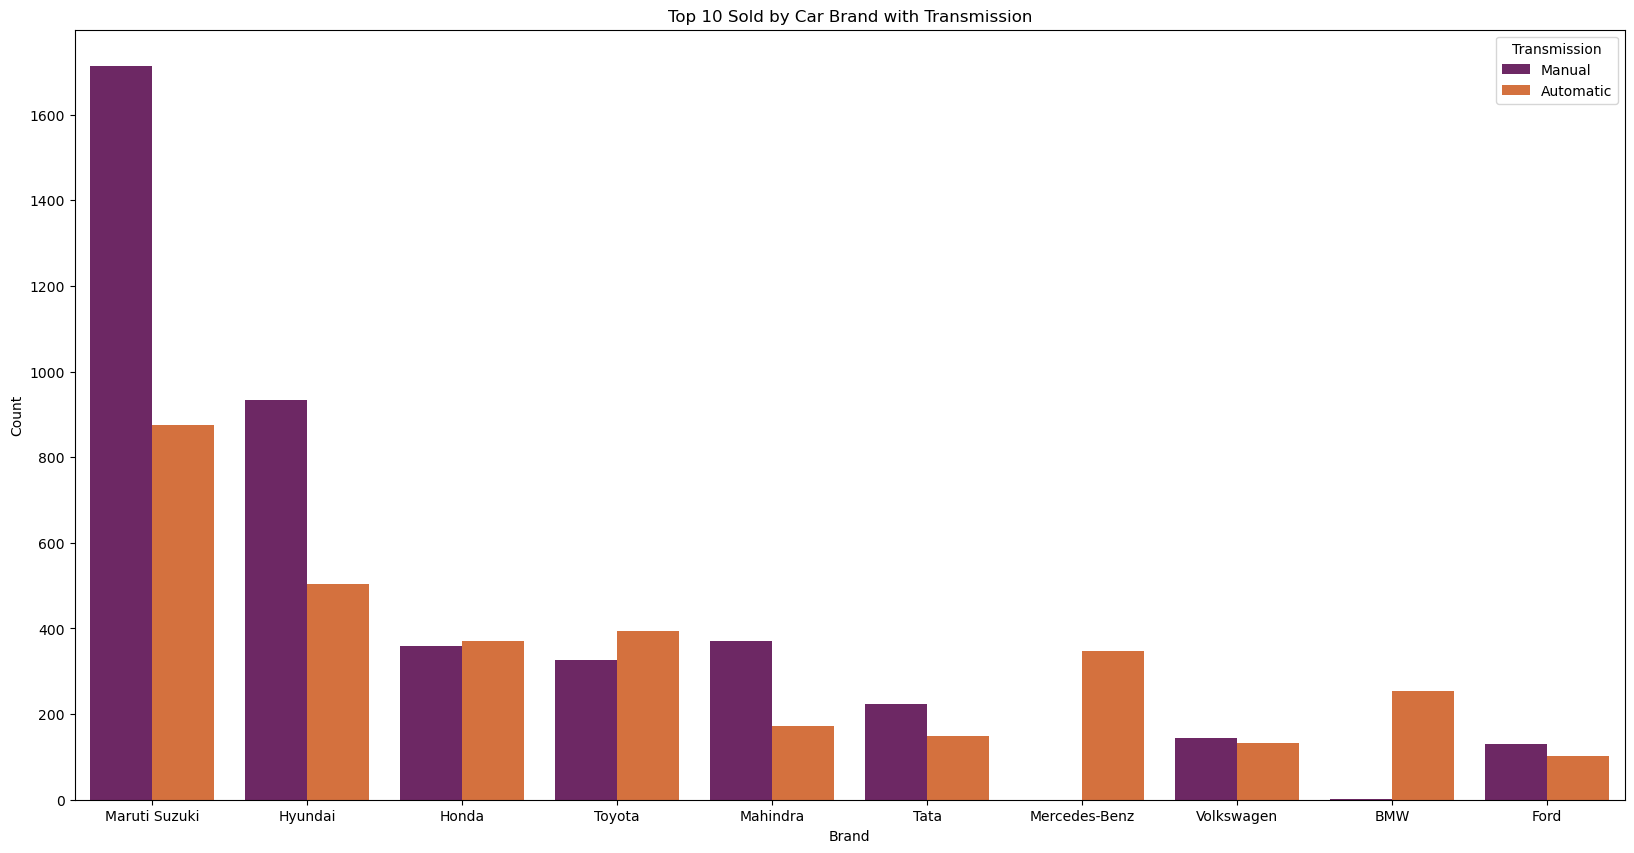

In [24]:
# visualisasi sold by car brand with transmission
top_10_brands = df['Brand'].value_counts().head(10).index

plt.figure(figsize=(20, 10))
sns.countplot(x='Brand', hue='Transmission', data=df, palette="inferno", order=top_10_brands)
plt.title("Top 10 Sold by Car Brand with Transmission")
plt.xlabel("Brand")
plt.ylabel("Count")

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_22936\4222810190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='AskPrice', data=df, palette="inferno")


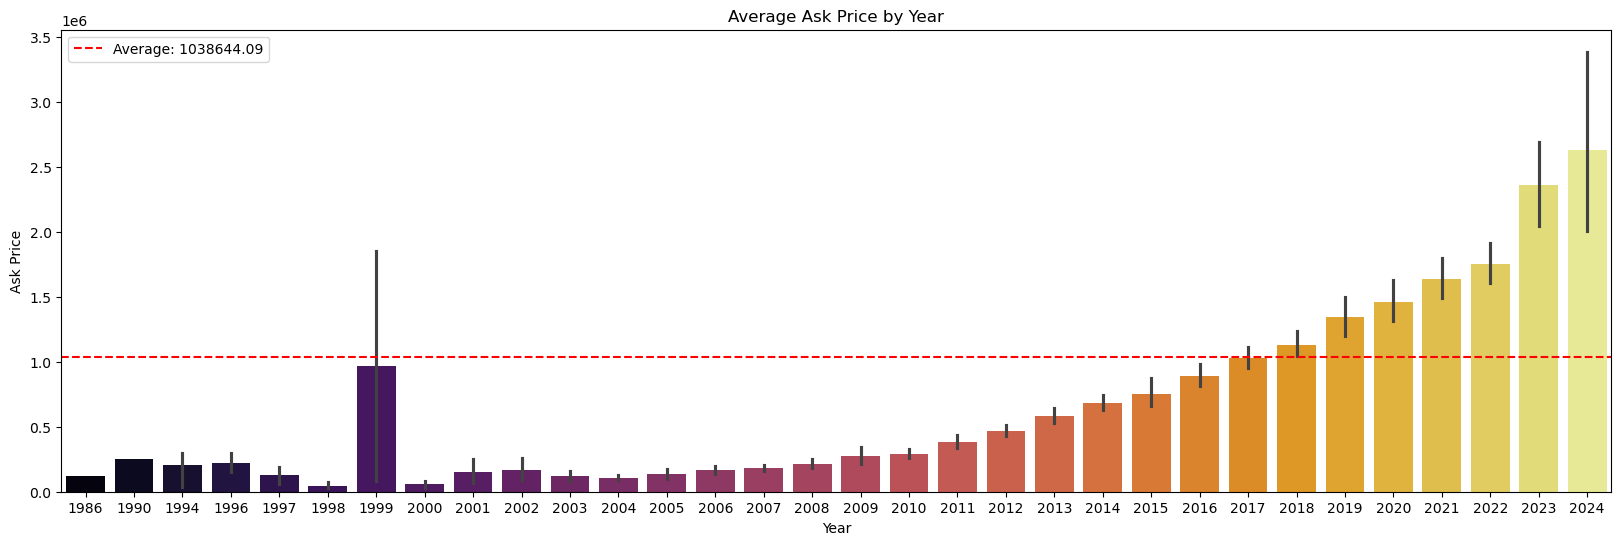

2016.377697435318


In [28]:
# visualisasi year average price
plt.figure(figsize=(20, 6))
sns.barplot(x='Year', y='AskPrice', data=df, palette="inferno")
average_price = df['AskPrice'].mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:.2f}')
plt.title("Average Ask Price by Year")
plt.xlabel("Year")
plt.ylabel("Ask Price")
plt.legend()
plt.show()

# Rata-rata tahun mobil
print(df['Year'].mean())

C:\Users\ACER\AppData\Local\Temp\ipykernel_22936\2594263696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='AskPrice', data=df, palette="inferno")


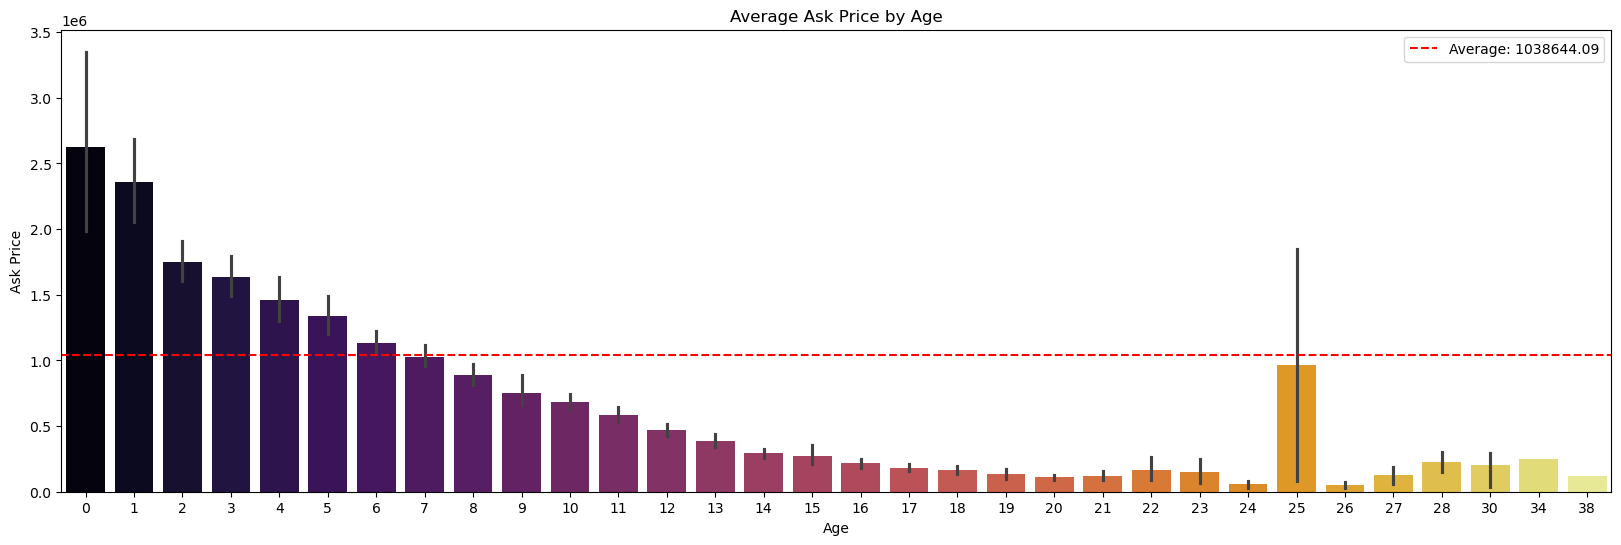

7.622302564681957


In [29]:
# visualisasi age average price
plt.figure(figsize=(20, 6))
sns.barplot(x='Age', y='AskPrice', data=df, palette="inferno")
average_price = df['AskPrice'].mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:.2f}')
plt.title("Average Ask Price by Age")
plt.xlabel("Age")
plt.ylabel("Ask Price")
plt.legend()
plt.show()

# Rata-rata umur mobil
print(df['Age'].mean())


C:\Users\ACER\AppData\Local\Temp\ipykernel_22936\2881834072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FuelType', y='AskPrice', data=df, palette="inferno")


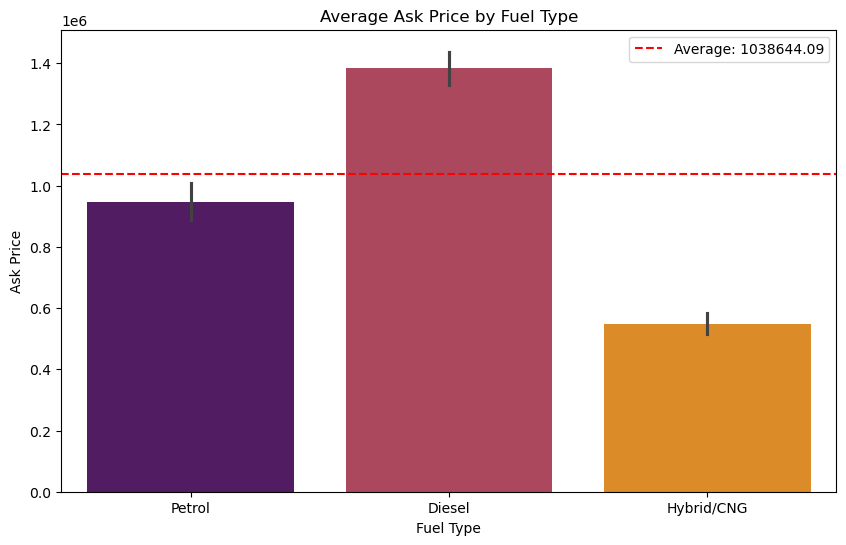

In [25]:
# visualisasi fuel type average price

plt.figure(figsize=(10, 6))
sns.barplot(x='FuelType', y='AskPrice', data=df, palette="inferno")

average_price = df['AskPrice'].mean()

plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:.2f}')

plt.title("Average Ask Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Ask Price")
plt.legend()
plt.show()

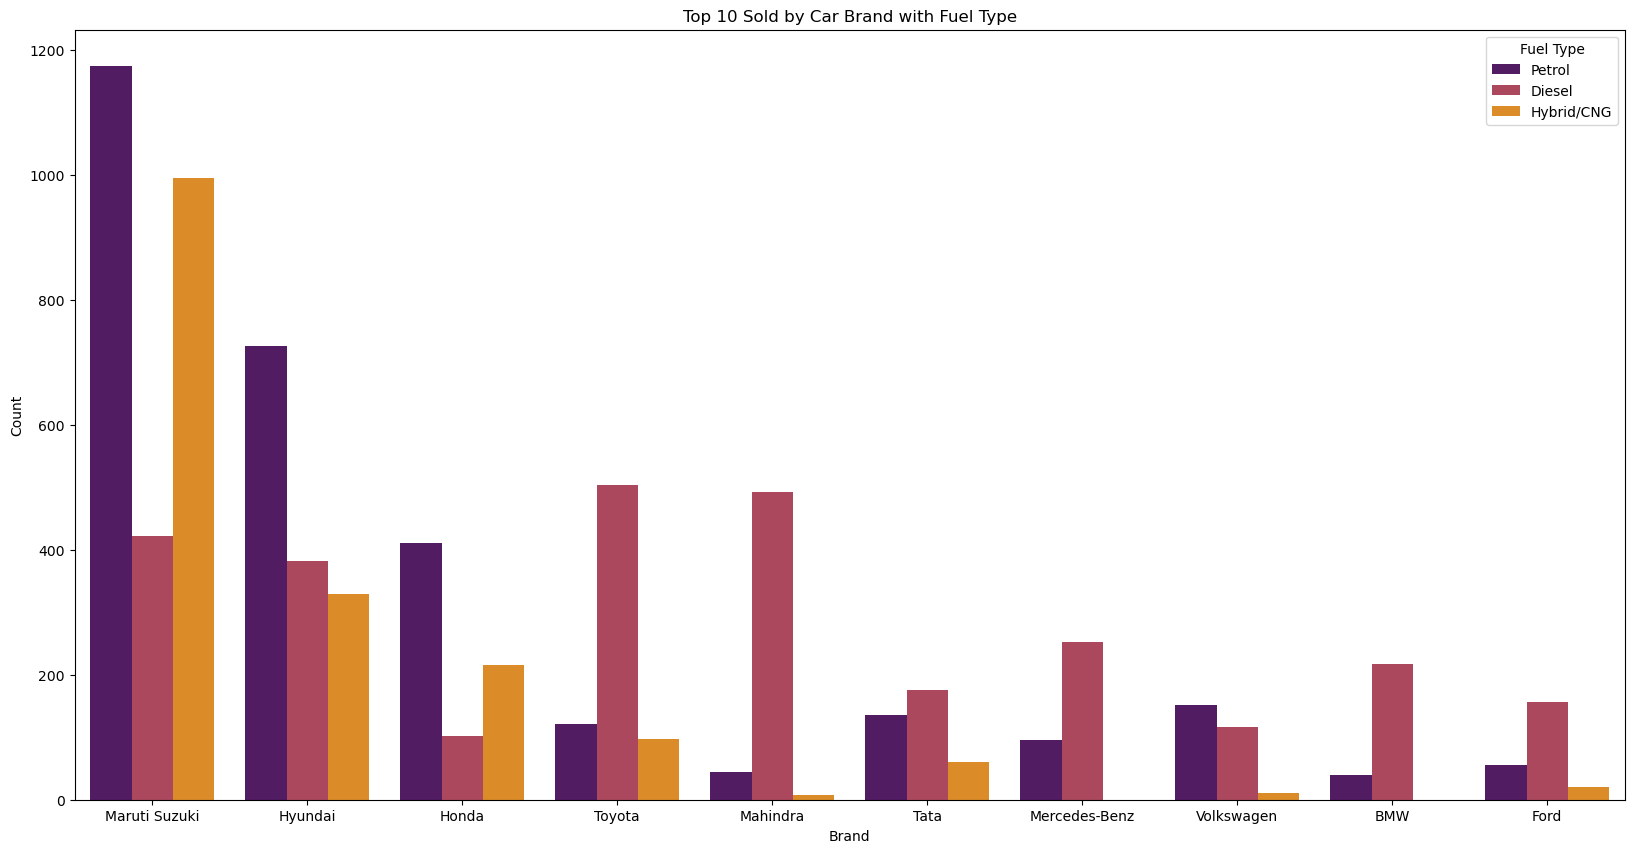

In [31]:
# Ambil 10 brand teratas berdasarkan jumlah penjualan
top_10_brands = df['Brand'].value_counts().head(10).index

# Plot penjualan berdasarkan brand dan jenis bahan bakar
plt.figure(figsize=(20, 10))
sns.countplot(x='Brand', hue='FuelType', data=df, palette="inferno", order=top_10_brands)
plt.title("Top 10 Sold by Car Brand with Fuel Type")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Fuel Type")
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_22936\1058435826.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette="inferno")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


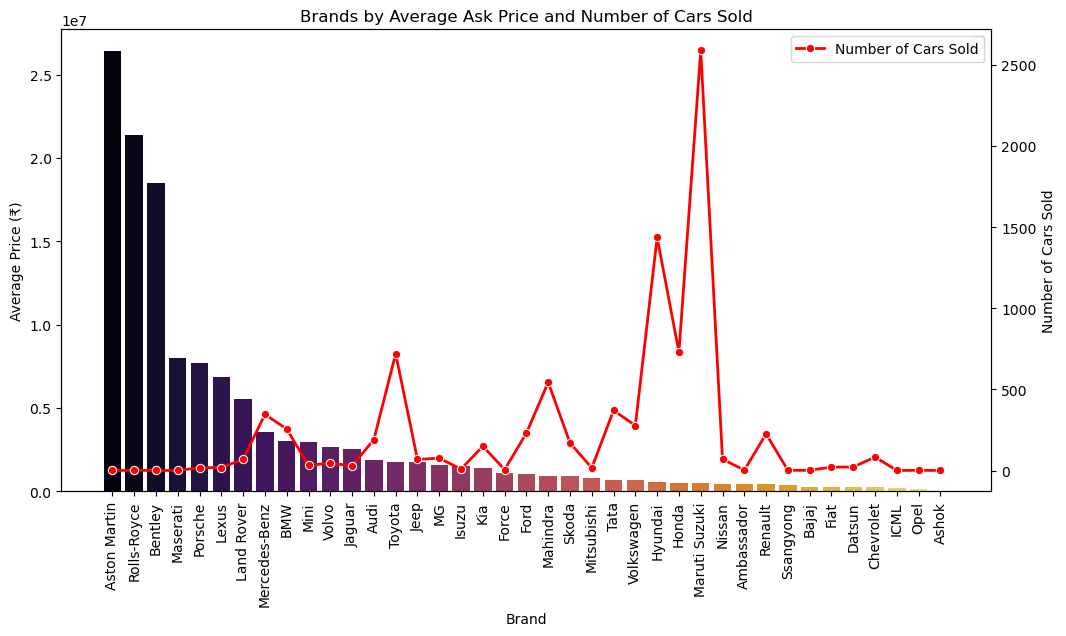

In [16]:
# Menghitung rata-rata harga per brand
avg_price_by_brand = df.groupby('Brand')['AskPrice'].mean().sort_values(ascending=False)

# Menghitung jumlah mobil yang dibeli per brand
brand_counts = df['Brand'].value_counts().loc[avg_price_by_brand.index]

# Membuat plot
plt.figure(figsize=(12, 6))

# Barplot untuk rata-rata harga per brand
ax1 = sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette="inferno")

# Membuat sumbu kedua untuk lineplot jumlah mobil yang dibeli
ax2 = ax1.twinx()
sns.lineplot(x=brand_counts.index, y=brand_counts.values, marker='o', ax=ax2, color='red', label='Number of Cars Sold', linewidth=2)

# Menambahkan judul, label, dan pengaturan lainnya
ax1.set_title("Brands by Average Ask Price and Number of Cars Sold")
ax1.set_xlabel("Brand")
ax1.set_ylabel("Average Price (₹)")
ax2.set_ylabel("Number of Cars Sold")

# Rotasi label x-axis
ax1.tick_params(axis='x', rotation=90)

# Menambahkan legenda
ax1.legend(labelspacing=1.2)
ax2.legend(labelspacing=1.2)

# Menampilkan plot
plt.show()


Insight

1. The year of production and age of the car have a big influence on the price. Newer cars (0-2 years old) tend to have higher prices, while older cars (10+ years old) are cheaper, except for classic cars that have historical value.

2. Diesel cars have the highest average price, followed by gasoline, while hybrid/CNG have lower prices.

3. Cars with automatic transmissions have a higher average price compared to manual transmissions. However, manual transmissions are more widely used, especially by mass-market brands like Maruti Suzuki and Hyundai.

4. Maruti Suzuki leads the market with the highest sales in both the gasoline and hybrid/CNG segments. Toyota excels in the diesel segment.

5. Premium brands have much higher prices, but lower sales volumes compared to popular affordable brands like Maruti Suzuki and Hyundai.

6. Consumers tend to choose cars that are affordable and fuel-efficient. Cars with manual transmissions and gasoline fuel are more sold.